In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


##VISUAL CHALLENGE


In [2]:
mouse_data_path = r"data\Mouse_metadata.csv"
study_results_path = r"data\Study_results.csv"

In [3]:
mouse_data = pd.read_csv(mouse_data_path)
study_results_data = pd.read_csv(study_results_path)

In [4]:
full_data_df = pd.merge(mouse_data,study_results_data,how="outer",on=["Mouse ID"])
unique_mouse_ids_count = len(full_data_df["Mouse ID"].unique())
print(unique_mouse_ids_count)
duplicate_mouse_df = full_data_df[full_data_df.duplicated(["Mouse ID", "Timepoint"])]
clean_full_df = pd.concat([full_data_df,duplicate_mouse_df,duplicate_mouse_df]).drop_duplicates(keep=False) #Thanks https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe

249


In [5]:
new_uniques_count = len(clean_full_df["Mouse ID"].unique())
print(new_uniques_count)
tumor_vol_by_drug =clean_full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mice_summary = pd.DataFrame({
    "mean tumor volume":tumor_vol_by_drug.agg("mean"),
    "median tumor volume":tumor_vol_by_drug.agg("median"),
    "variance tumor volume":tumor_vol_by_drug.agg("var"),
    "tumor volume standard deviation":tumor_vol_by_drug.agg("std"),
    "tumor vol sem":tumor_vol_by_drug.agg("sem")    
})

249


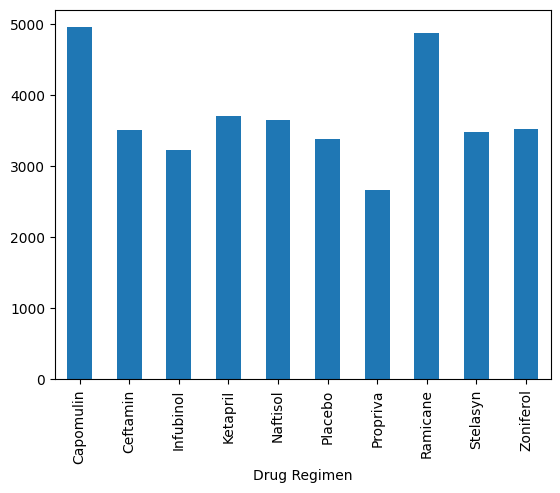

In [6]:
timepoints_by_drug = clean_full_df.groupby("Drug Regimen")["Timepoint"].agg("sum")
timepoint_plt = timepoints_by_drug.plot(kind="bar")

<BarContainer object of 10 artists>

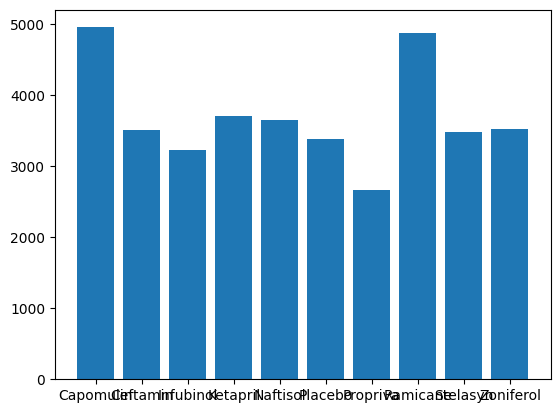

In [7]:
plt.bar(timepoints_by_drug.index,timepoints_by_drug)
# plt.show()

<Axes: ylabel='Sex'>

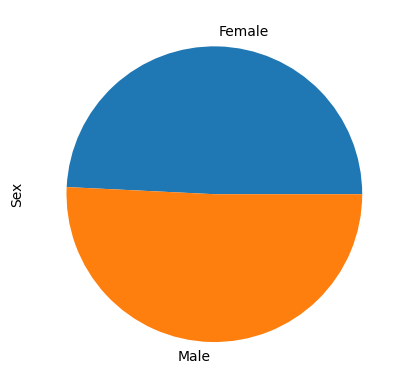

In [8]:
sex_distro = clean_full_df.groupby("Sex")["Sex"].count()
sex_distro.plot(kind="pie")

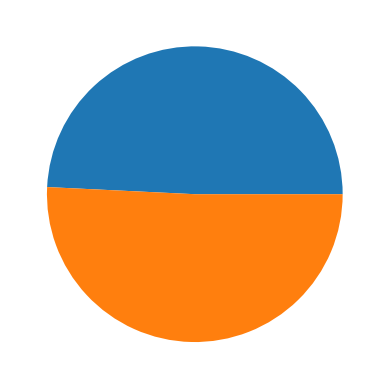

In [9]:
plt.pie(sex_distro)
plt.show()

In [10]:
special_meds = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
discrim = []
latest_times = clean_full_df.groupby("Mouse ID")["Timepoint"].max()
lates_full_df = pd.merge(latest_times,clean_full_df,how="inner", on="Mouse ID")
final_vol = lates_full_df[lates_full_df["Timepoint_x"] == lates_full_df["Timepoint_y"]].reset_index()
simplified_df = pd.DataFrame(final_vol[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]])
for drug in special_meds:
    discrim.append(pd.DataFrame(simplified_df[simplified_df["Drug Regimen"] == drug]))

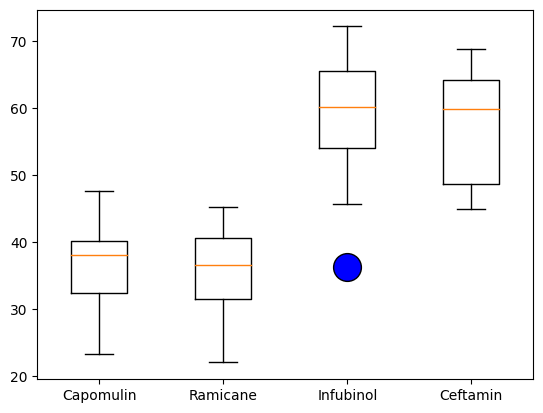

In [11]:
tumor_vols = []
for i in discrim:
    tumor_vols.append(i["Tumor Volume (mm3)"])
plt.boxplot(tumor_vols,labels=special_meds, flierprops={"markerfacecolor":'b', "markersize":20})
plt.show()

<Axes: xlabel='Timepoint'>

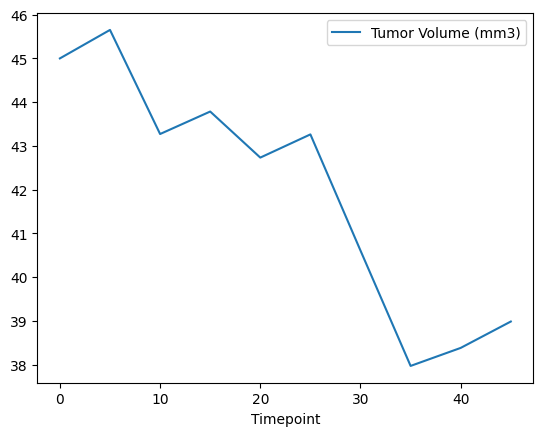

In [12]:
mouse_1 = discrim[0].iloc[0]
mouse_1_info = clean_full_df[clean_full_df["Mouse ID"] == mouse_1["Mouse ID"]][["Timepoint","Tumor Volume (mm3)"]]
mouse_1_info.plot(x="Timepoint")

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.876706
Tumor Volume (mm3),0.876706,1.000000


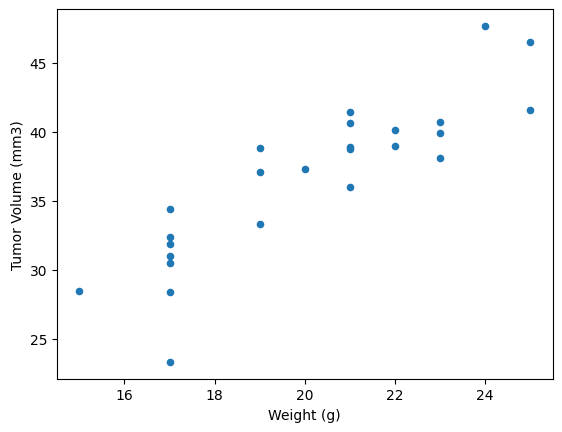

In [13]:
capomulin_weights = discrim[0][["Weight (g)", "Tumor Volume (mm3)"]]
capomulin_weights.plot(x="Weight (g)",y="Tumor Volume (mm3)",kind="scatter")
cor = capomulin_weights.corr()
cor

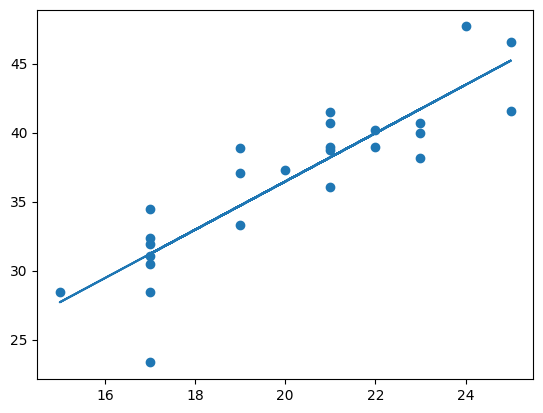

In [14]:
capomulin_weights_linear_regression = st.linregress(capomulin_weights["Weight (g)"],capomulin_weights["Tumor Volume (mm3)"])
comp_m = capomulin_weights_linear_regression[0]
comp_b = capomulin_weights_linear_regression[1]
plt.scatter(x=capomulin_weights["Weight (g)"], y=capomulin_weights["Tumor Volume (mm3)"])
plt.plot(capomulin_weights["Weight (g)"], comp_m*capomulin_weights["Weight (g)"] + comp_b)